In [23]:
import pandas as pd
import matplotlib.pyplot as plt

from gluonts.dataset.common import ListDataset
from gluonts.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer
from gluonts.dataset.util import to_pandas

In [18]:
url = "../../2.1.datasets/Twitter_volume_AMZN.csv"
data_df = pd.read_csv(url, header=0, index_col=0)
print("type:{}, shape:{}, min_index:{}, max_index:{}".format(type(data_df), data_df.shape, data_df.index.min(), data_df.index.max()))
data_df.head(5)

type:<class 'pandas.core.frame.DataFrame'>, shape:(15831, 1), min_index:2015-02-26 21:42:53, max_index:2015-04-22 20:52:53


,value
timestamp,
2015-02-26 21:42:53,57
2015-02-26 21:47:53,43
2015-02-26 21:52:53,55
2015-02-26 21:57:53,64
2015-02-26 22:02:53,93


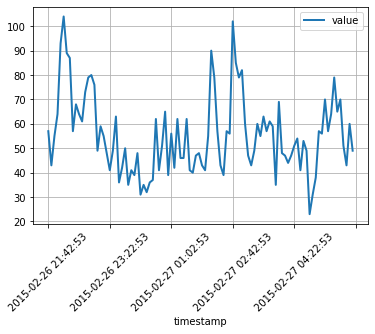

In [19]:
data_df[:100].plot(linewidth=2)
plt.grid(which='both')
plt.xticks(rotation=45)
plt.show()

In [24]:
training_data = ListDataset(
    [{"start": data_df.index[0], "target": data_df.value[:"2015-04-05 00:00:00"]}],
    freq = "5min"
)

estimator = DeepAREstimator(freq="5min", prediction_length=12, trainer=Trainer(epochs=10))
predictor = estimator.train(training_data=training_data)

100%|██████████| 50/50 [00:02<00:00, 22.11it/s, epoch=10/10, avg_epoch_loss=3.94]


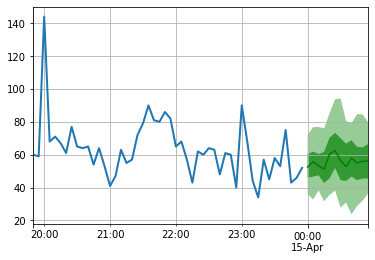

In [33]:
test_data = ListDataset(
    [{"start": data_df.index[0], "target": data_df.value[:"2015-04-15 00:00:00"]}],
    freq = "5min"
)

for test_entry, forecast in zip(test_data, predictor.predict(test_data)):
    to_pandas(test_entry)[-50:].plot(linewidth=2)
    forecast.plot(color='g', prediction_intervals=[50.0, 90.0])
plt.grid(which='both')

In [42]:
df = predictor.predict(test_data)
df

<generator object GluonPredictor.predict at 0x000001BDB2820C48>

In [38]:
df = to_pandas(test_entry)
df

2015-02-26 21:40:00    57.0
2015-02-26 21:45:00    43.0
2015-02-26 21:50:00    55.0
2015-02-26 21:55:00    64.0
2015-02-26 22:00:00    93.0
                       ... 
2015-04-14 23:35:00    53.0
2015-04-14 23:40:00    75.0
2015-04-14 23:45:00    43.0
2015-04-14 23:50:00    46.0
2015-04-14 23:55:00    52.0
Freq: 5T, Length: 13564, dtype: float32